# Name: Mayur Chiplunkar
Data Science and Business Analytics Intern at The Sparks Foundation.
Graduate Rotational Internship Program (Batch - June 2023).
Problem Statement: Predict the percentage of a student based on the number of study hours.

Information about data set:

The data was provided by a link: http://bit.ly/w-data
It consisted of observations on 25 student about the numbers of hours each studied and their respective test scores

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, bartlett
from sklearn import metrics
from statsmodels.stats.stattools import durbin_watson
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Importing Dataset & Checking for null values

The Data was provided by as remote link.

In [2]:
link = "http://bit.ly/w-data"
df = pd.read_csv(link)

df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

*Since the data provided disn't had any null values, we continue with our analysis.*

# Checking Normality using Shapiro-Wilk Test

In [4]:
shapiro(df['Hours'])


ShapiroResult(statistic=0.9401377439498901, pvalue=0.1491193175315857)

*Since p-value > 0.05, we can assume that our data is normally distributed*



# Checking Correlation between both variables

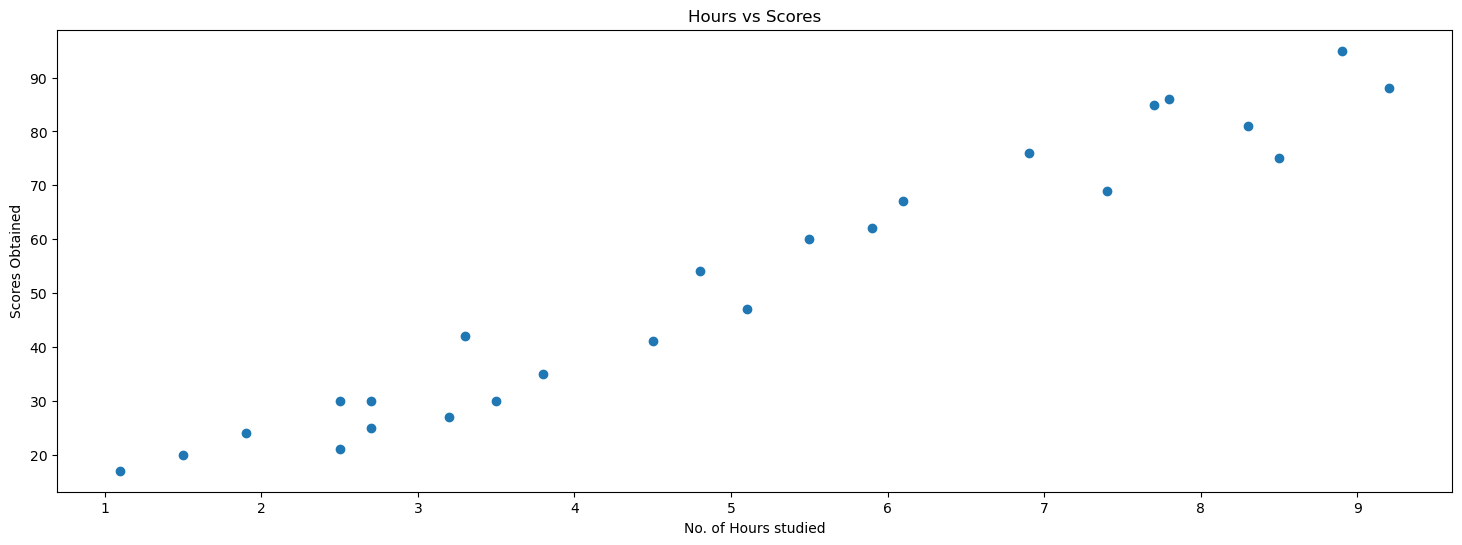

In [5]:
plt.figure(figsize=(18,6))
plt.scatter(df.Hours, df.Scores)
plt.title("Hours vs Scores")
plt.xlabel("No. of Hours studied")
plt.ylabel("Scores Obtained")
plt.show()


*We can observe that there is a positive linear correlation between Hours and Scores. Hence, we move ahead.*



# Preparing the Data

In [7]:
x = df.iloc[ : , :-1].values
y = df.iloc[ : , 1].values

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


# Training the algorithm


In [9]:
reg = LinearRegression()
reg.fit(x_train, y_train)

reg.score(x_train, y_train)

0.9491209376364416

# Checking Assumptions

# *Linearity*

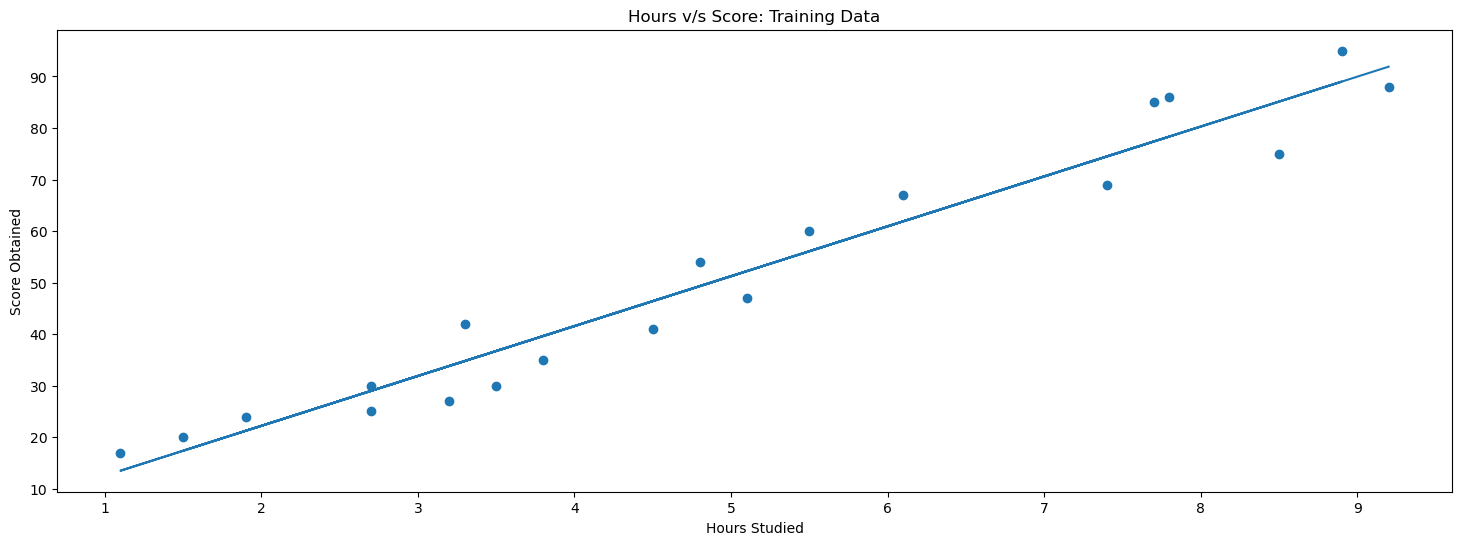

0.9491209376364416

In [10]:
plt.figure(figsize=(18,6))
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train))
plt.title('Hours v/s Score: Training Data')
plt.xlabel('Hours Studied')
plt.ylabel('Score Obtained')
plt.show()

reg.score(x_train, y_train)

We can see from the Graph that there is a linear relationship between the Independent & Dependent variables



# *Mean of Residuals*



One of the assumptions of linear regression is that the mean of the residuals must be equal to zero.



In [11]:
y_pred_train = reg.predict(x_train)
residuals = y_train - y_pred_train
mean_residuals = np.mean(residuals)
print("Mean of Residuals = {}".format(mean_residuals))

Mean of Residuals = 8.08242361927114e-15


The mean of the residuals is so small that we can consider it zero.



# *Homoscedasticity*



Homoscedasticity means that the residuals have equal or almost equal variance. One of the way to predict is by using scatter plot and if there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then homoscedasticity is not present.

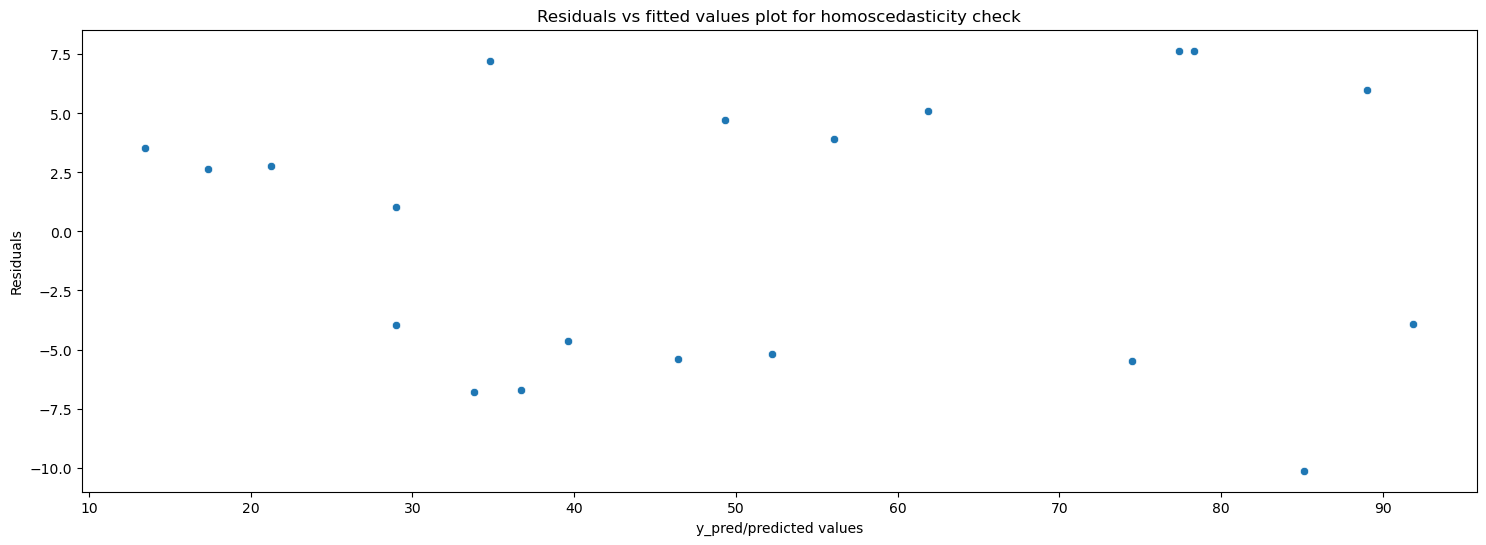

In [12]:
plt.figure(figsize=(18,6))
sns.scatterplot(y_pred_train, residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

From the scatter plot it is clear that there is no specific patters forming. So we can say homoscedasticity is present.



# *Autocorrelation*

Autocorrelation takes place when there's a pattern in the rows of the data.



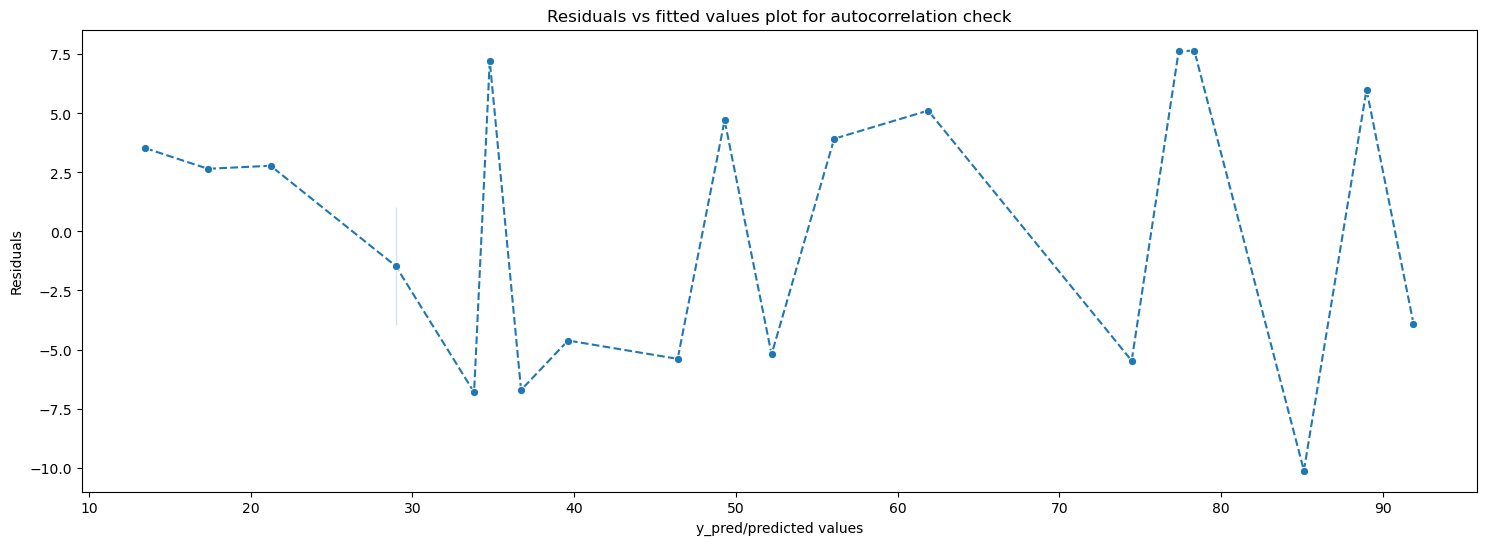

In [13]:
plt.figure(figsize=(18,6))
sns.lineplot(y_pred_train, residuals, marker = 'o', linestyle = '--')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs fitted values plot for autocorrelation check')
plt.show()

As we can observe that there is no pattern forming so we can say that ther is no autocorrelation.



# Predicting for test data


In [14]:
y_pred = reg.predict(x_test)
print(y_pred)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [15]:
comp = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_pred})
comp

,Actual values,Predicted values
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [16]:
reg.score(x_test, y_test)


0.9678055545167994

# Predicting for self given values


In [17]:
hours = float(input("Enter study hours:"))
hours = [[hours]]
self_pred = reg.predict(hours)
print("Predicted Score = {}".format(self_pred[0]))

Enter study hours:9.25
Predicted Score = 92.38611528261494


# Model Evaluation

*For evaluating our model we are going to use Root Mean Squared Error (RMSE) & Mean Absolute Percentage Error (MAPE)*



In [18]:
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Root Mean Squared Error:  4.352380006653288


In [19]:
print("Mean Absolute Percentage Error: ", metrics.mean_absolute_percentage_error(y_test, y_pred))


Mean Absolute Percentage Error:  0.10600118977553538


# Summary:


So here we have anticipated level of understudies by entering number of study hours. Which I have finished with the assistance of direct linear regression model since we have just a single independent variable.

# Thank you 😃 !
